# Final Project for Principles of Data Analytics - GMIT 2024/01

#### Author: Gustavo Fernandes

# Palmer Penguins

***

This notebook contains my analusis of the famous palmer panguins dataset.

![Palmer](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Antarctica_6400px_from_Blue_Marble.jpg/240px-Antarctica_6400px_from_Blue_Marble.jpg)

The Data set is avaiable on [GitHub](https://allisonhorst.github.io/palmerpenguins/).





### Imports

We use pandas for the DataFame data structure.

It allows us to invetsigate CSV files, amoungst other features.

In [2]:
# Data frames.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(pd.__file__)
print(pd.__version__)

C:\Users\gusgo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\__init__.py
2.2.1


### Load Data

Load the palmer penguins dara set from a URL

In [3]:
#Load the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded and we can inspect it.

In [4]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Task 01 - Create an overview of the data set and the variables it contains

### Inspect Data

In [5]:
#Look at forst row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [6]:
#Sex of penguins

df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [7]:
#count of Sex of penguins

df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [8]:
#Describe data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
island_counts = df.groupby(['species', 'island'])['island'].count().unstack()
island_counts.columns = ['Biscoe', 'Dream', 'Torgersen']
print(island_counts)

           Biscoe  Dream  Torgersen
species                            
Adelie       44.0   56.0       52.0
Chinstrap     NaN   68.0        NaN
Gentoo      124.0    NaN        NaN


In [10]:
gender_counts = df.groupby(['species', 'sex'])['sex'].count().unstack()
gender_counts.columns = ['Female', 'Male']
print(gender_counts)

           Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61


In [30]:
penguins_mean = df.groupby('species')[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].mean().reset_index()
penguins_mean = penguins_mean.merge(gender_counts, on='species')
penguins_mean = penguins_mean.merge(island_counts, on='species')
penguins_mean.columns = ['Species', 'Bill Length Mean (mm)', 'Mean Bill Depth (mm)','Flipper Length (mm)','Mean Body MAss (g)', 'Female (total)', 'Male (total)', 'Biscoe (total)', 'Dream (total)', 'Torgersen (total)']
penguins_mean

,Species,Bill Length Mean (mm),Mean Bill Depth (mm),Flipper Length (mm),Mean Body MAss (g),Female (total),Male (total),Biscoe (total),Dream (total),Torgersen (total)
0,Adelie,38.791391,18.346358,189.953642,3700.662252,73,73,44.0,56.0,52.0
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235,34,34,NaN,68.0,NaN
2,Gentoo,47.504878,14.982114,217.186992,5076.016260,58,61,124.0,NaN,NaN


In [12]:
print(penguins_mean.to_string(), file=open('penguins.summary.txt', 'w'))

In [28]:
penguins_group = df.groupby('species')

for species, species_data in penguins_group:
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(f'Specie {species} Histograms')
    for i, column in enumerate(df.columns[2:6]):
        ax = axs[i // 2, i % 2]
        ax.hist(species_data[column])
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    plt.savefig(f'sp_{species}_histograms.png')
    plt.close()

In [29]:
penguins_group = df.groupby('island')

for island, island_data in penguins_group:
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(f'Island {island} Histograms')
    for i, column in enumerate(df.columns[2:6]):
        ax = axs[i // 2, i % 2]
        ax.hist(island_data[column])
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    plt.savefig(f'is_{island}_histograms.png')
    plt.close()

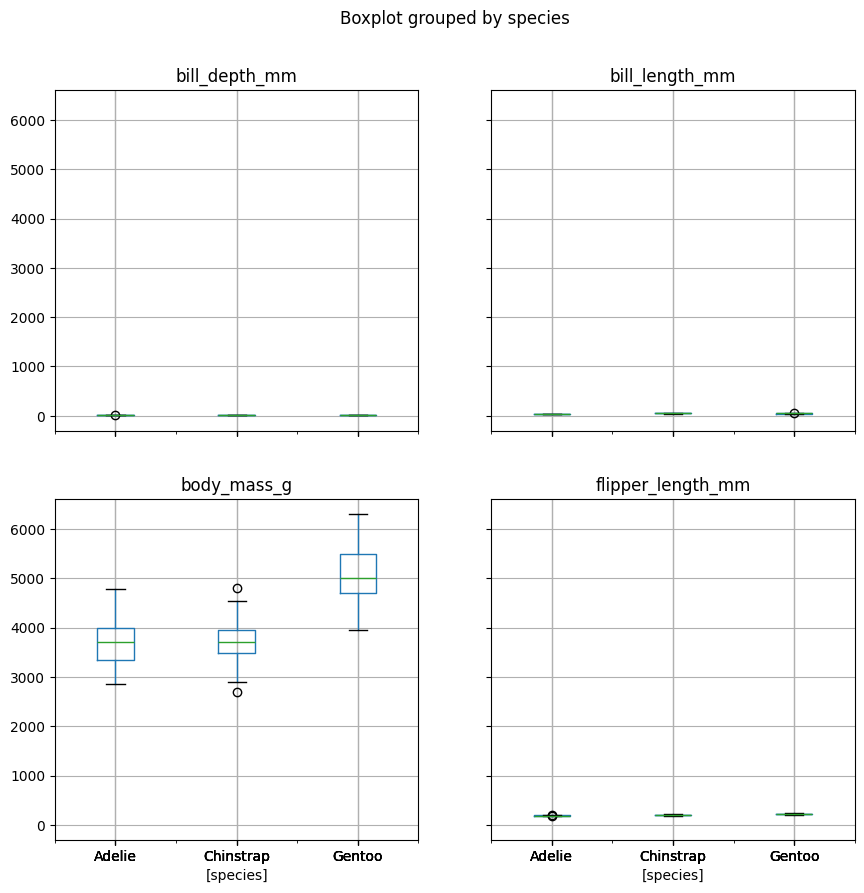

In [15]:
#Box and Whisker Plots
df.boxplot(by='species', figsize=(10, 10))
plt.savefig('penguins_boxplot.png')

***
### Resource

https://vlegalwaymayo.atu.ie/

https://ianmcloughlin.github.io/2324_principles_of_data_analytics/

[Co-pilot]

https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

### Tables

***

|Species   |Bill Lenght (mm)| Body Mass (g)|
|----------|---------------:|-------------:|
|Adelie    |             8.8|          3701|
|Chinstrap |            48.8|          3733|
|Gentoo    |            47.5|          5076|


```
pyhton
print("Python is a great language!")
a=a+1
print(a)
```

***

# End